<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий


# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 1. Обзор библиотеки Pandas</center>

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [86]:
salaries = pd.Series([400, 300, 200, 250],
                    index = ['Andrew', 'Bob', 
                             'Charles', 'Ann'])
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [87]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [88]:
print(salaries.Andrew == salaries['Andrew']) 
print(salaries.Andrew)
print(salaries['Andrew'])

True
400
400


In [89]:
salaries['Carl'] = np.nan
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64


In [90]:
salaries.fillna(salaries.median(), inplace=True)

In [91]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Series поддерживает пропуски в данных.**

In [92]:
#salaries.ccc = 0 # doesnt work?
salaries['d'] = np.nan # Series can contain missing values


print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
d            NaN
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [93]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
d                    NaN
dtype: float64


### DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [95]:

df1 = pd.DataFrame(np.random.rand(5,3),
                  index = ['o1', 'o2','o3', 'o4', '05'],
                  columns = ['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,0.658799,0.161898,0.119177
o2,0.096830,0.230225,0.013335
o3,0.667717,0.658972,0.865932
o4,0.471822,0.076427,0.547904
05,0.204439,0.296156,0.030934


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [96]:
df2 = pd.DataFrame({'A' : np.random.random(5),
                    'B' : ['a', 'b', 'c', 'd', 'e'],
                    'C' : np.arange(5)>2})
df2

,A,B,C
0,0.176595,a,False
1,0.989548,b,False
2,0.349383,c,False
3,0.356077,d,True
4,0.200732,e,True


**Обращение к элементам (или целым кускам фрейма):**

In [102]:
print('The element in position 3, C is', df2.at[3, 'C'], '\n')
df2.loc[[1, 4], ['A', 'B']]

The element in position 3, C is True 



,A,B
1,0.989548,b
4,0.200732,e


**Изменение элементов и добавление новых:**

In [105]:
df2.at[2, 'B'] = 'f'
print(df2)
df2.at[[2], ['B']] = 'GGG'
df2

          A  B      C
0  0.176595  a  False
1  0.989548  b  False
2  0.349383  f  False
3  0.356077  d   True
4  0.200732  e   True


,A,B,C
0,0.176595,a,False
1,0.989548,b,False
2,0.349383,GGG,False
3,0.356077,d,True
4,0.200732,e,True


In [14]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.106554,a,False
1,0.679854,b,False
2,0.143093,f,False
3,0.426745,d,True
4,0.459345,e,True
5,3.141500,c,False


In [106]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

,A,B,C
o1,0.658799,0.161898,0.119177
o2,0.096830,0.230225,0.013335
o3,0.667717,0.658972,0.865932
o4,0.471822,0.0764268,0.547904
05,0.204439,0.296156,0.030934
0,0.176595,a,0.000000
1,0.989548,b,0.000000
2,0.349383,GGG,0.000000
3,0.356077,d,1.000000
4,0.200732,e,1.000000


#### Обработка пропущенных значений

In [111]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1.at['o1', 'C'] = 0
df1

,A,B,C
o1,0.658799,0.161898,0.000000
o2,NaN,0.230225,0.013335
o3,0.667717,0.658972,0.865932
o4,0.471822,0.076427,NaN
05,0.204439,0.296156,0.030934


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [112]:
pd.isnull(df1) # is NaN

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
05,False,False,False


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [114]:
df1.dropna(how='any') # не удаляет

           A         B         C
o1  0.658799  0.161898  0.000000
o3  0.667717  0.658972  0.865932
05  0.204439  0.296156  0.030934
           A         B         C
o1  0.658799  0.161898  0.000000
o2       NaN  0.230225  0.013335
o3  0.667717  0.658972  0.865932
o4  0.471822  0.076427       NaN
05  0.204439  0.296156  0.030934


**Пропуски можно заменить каким-то значением.**

In [115]:
df1.fillna(0)
print(df1)

           A         B         C
o1  0.658799  0.161898  0.000000
o2       NaN  0.230225  0.013335
o3  0.667717  0.658972  0.865932
o4  0.471822  0.076427       NaN
05  0.204439  0.296156  0.030934


## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

Однако на практике DataFrame, с которым нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с DataFrame на примере следующего набора данных. Для каждрого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [117]:
df = pd.read_csv('../../data/beauty.csv', sep = ';')

**Посмотрим на размер данных и названия признаков.**

In [21]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [22]:
df.head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [119]:
df.head(n=4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [24]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [121]:
df.sort_values(by='wage', ascending = False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [132]:
df.sort_values(by=['black', 'looks'],
        ascending=[True, False]).head(10)



,wage,exper,union,goodhlth,black,female,married,service,educ,looks
26,14.84,29,0,1,0,0,0,1,13,5
27,19.08,17,0,1,0,0,0,0,17,5
76,23.32,15,0,1,0,0,1,1,17,5
112,6.11,7,0,1,0,1,1,0,12,5
316,3.92,12,0,1,0,0,1,1,12,5
363,10.66,8,0,1,0,0,0,0,13,5
492,2.51,4,0,1,0,1,0,0,12,5
506,4.40,3,0,1,0,1,0,0,13,5
512,5.09,7,0,1,0,1,0,0,17,5
534,3.81,4,0,1,0,0,1,0,12,5


In [173]:
df[(df.female == 1) & (df.black == 1)].sort_values(by='wage', ascending=False).head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
152,12.12,35,1,0,0,1,0,1,17,3
149,10.62,18,1,1,0,1,1,1,17,3
1004,10.54,35,1,1,1,0,1,0,10,3
334,10.53,18,0,1,0,1,1,1,16,3
18,10.44,10,0,1,0,1,0,0,17,4
700,10.26,27,0,1,1,0,0,0,12,3
184,10.22,26,0,1,0,1,0,1,17,3
181,10.15,16,1,1,1,0,0,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3


### Индексация и извлечение данных

DataFrame можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [27]:
df['goodhlth'].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [169]:
df[df['female'] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [29]:
df[(df['goodhlth'] == 1) & 
   (df['female'] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [30]:
df[(df['female'] == 0)]['wage'].mean() - \
df[(df['female'] == 1)]['wage'].mean()

3.069465017368837

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [175]:
df[(df['female'] == 0) & (df['union'] == 1)  
   & (df['exper'] < 10)]['wage'].max()

12.82

**Применение функции к каждому столбцу:**

In [32]:
df.apply(np.mean) 

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [33]:
df['looks'].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [199]:
g = df.groupby('looks') 
for (i, sub_df) in g:
    print(sub_df['wage'].mean(), sub_df['looks'].mean())


4.621538461538462 1.0
5.328802816901409 2.0
6.504598337950134 3.0
6.299340659340659 4.0
7.38842105263158 5.0


**Обращение к конкретной группе:**

In [193]:
d1 = g.get_group(5)
d1


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
26,14.84,29,0,1,0,0,0,1,13,5
27,19.08,17,0,1,0,0,0,0,17,5
76,23.32,15,0,1,0,0,1,1,17,5
112,6.11,7,0,1,0,1,1,0,12,5
316,3.92,12,0,1,0,0,1,1,12,5
363,10.66,8,0,1,0,0,0,0,13,5
492,2.51,4,0,1,0,1,0,0,12,5
506,4.40,3,0,1,0,1,0,0,13,5
512,5.09,7,0,1,0,1,0,0,17,5
534,3.81,4,0,1,0,0,1,0,12,5


### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

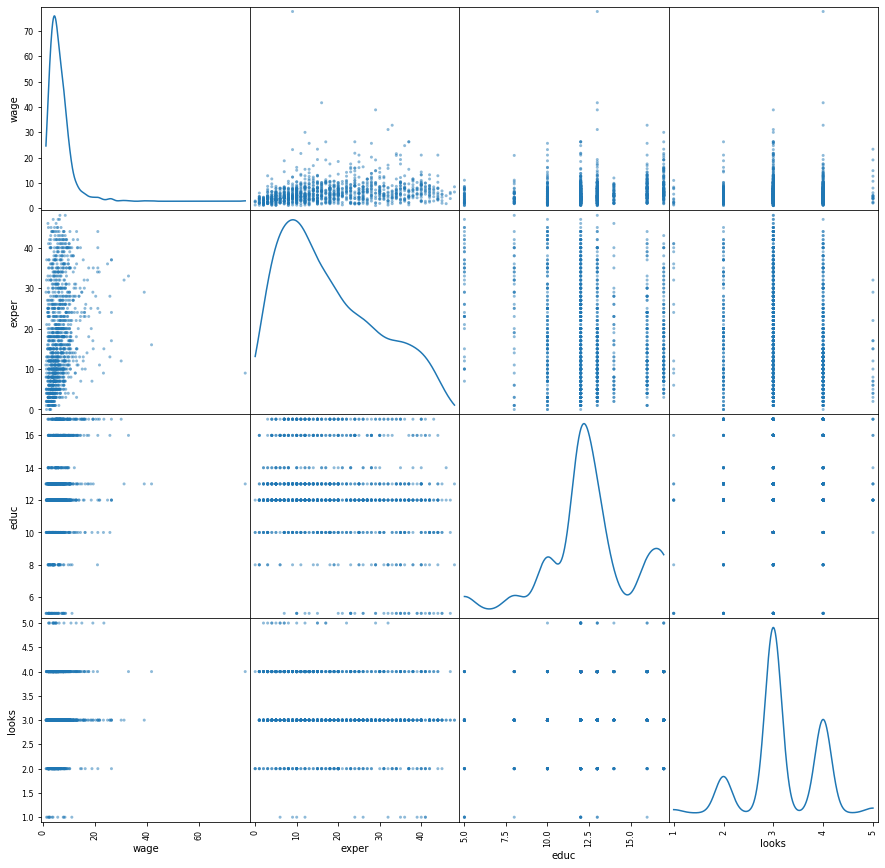

In [208]:
from pandas.plotting import scatter_matrix as scatter_matrix
scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

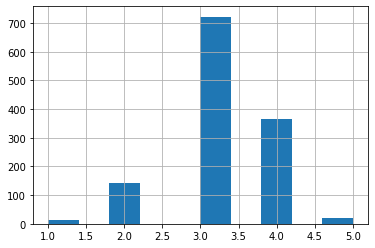

In [209]:
df['looks'].hist()

**Или сразу для всех:**

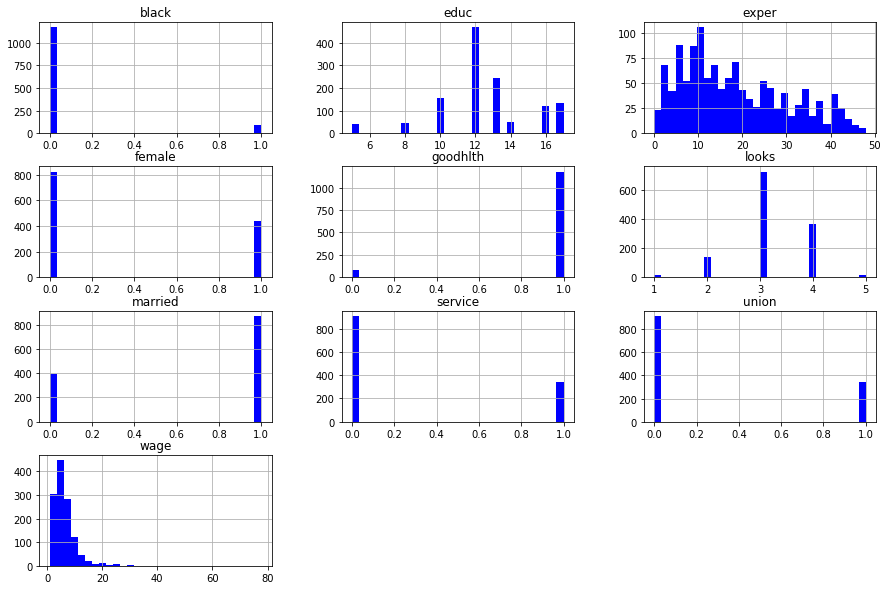

In [217]:
df.hist(color = 'b', bins = 30, figsize=(15,10))
plt.show()

In [218]:
len(df[(df['union'] == 1) & (df['service'] == 1)])

68

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

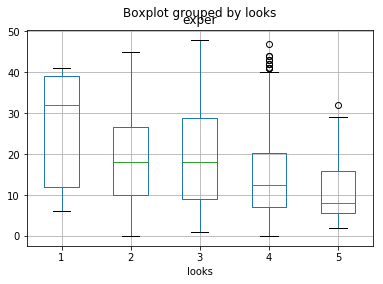

In [39]:
df.boxplot(column='exper', by='looks')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

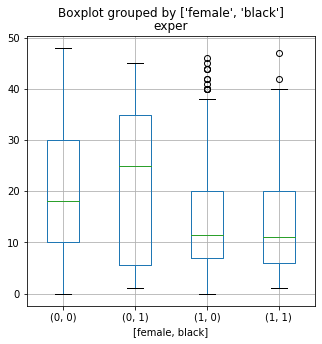

In [219]:
df.boxplot(column='exper',  by=['female', 'black'], 
           figsize=(5,5))
plt.show()